In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [5]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [7]:
df.columns = ['Month','Milk in pounds per cow']
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
# Weird last value at bottom causing issues
df.drop(168,axis=0,inplace=True)

In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [11]:
df.set_index('Month',inplace=True)

In [12]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


<AxesSubplot:xlabel='Month'>

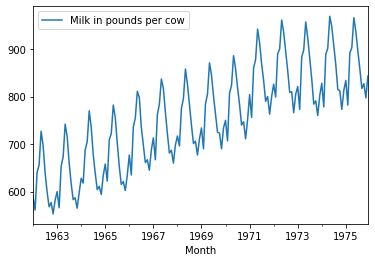

In [14]:
df.plot()

In [15]:
timeseries = df['Milk in pounds per cow']

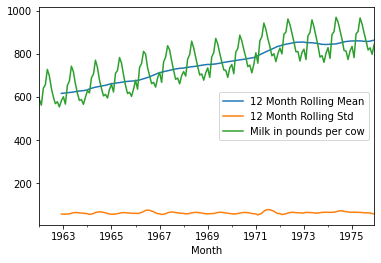

In [16]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

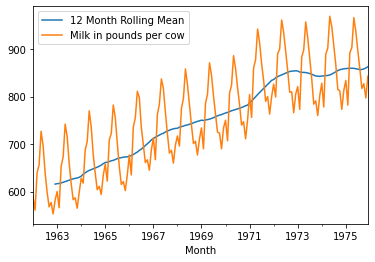

In [17]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

<Figure size 432x288 with 0 Axes>

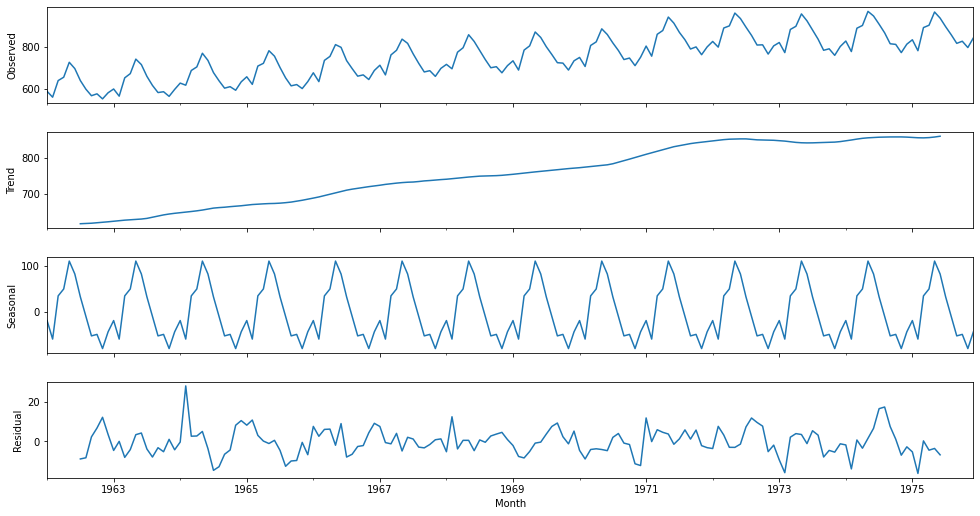

In [18]:
# ETS DECOMPISITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [19]:
# TESTING STATIONARITY
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
result = adfuller(df['Milk in pounds per cow'])

In [22]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221354
p-value : 0.627426708603029
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [23]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [24]:
# Differencing
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [25]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530166
p-value : 0.030068004001790025
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

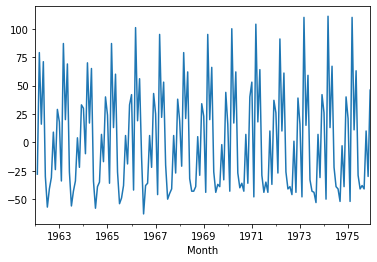

In [26]:
df['Milk First Difference'].plot()

In [27]:
# Sometimes it would be necessary to do a second difference 
# This is just for show, we didn't need to do a second difference in our case
df['Milk Second Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(1)

In [28]:
adf_check(df['Milk Second Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.327873645603306
p-value : 1.1126989332084267e-26
#Lags Used : 11
Number of Observations Used : 154
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

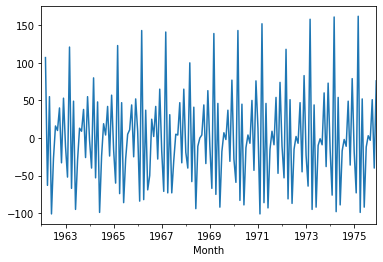

In [29]:
df['Milk Second Difference'].plot()

<AxesSubplot:xlabel='Month'>

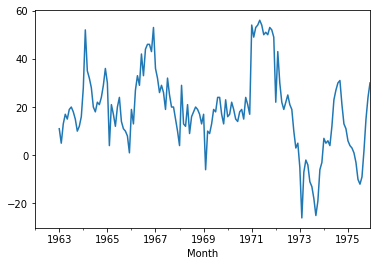

In [30]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)
df['Seasonal Difference'].plot()

In [31]:
# Seasonal Difference by itself was not enough!
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3354193143593984
p-value : 0.16079880527711332
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

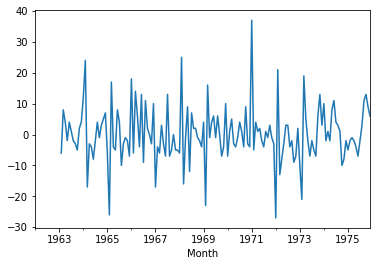

In [32]:
# You can also do seasonal first difference
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
df['Seasonal First Difference'].plot()

In [33]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921977
p-value : 1.8654234318788898e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [34]:
# Autocorrelation Interpretation
'''
The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic 
common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use 
the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would 
use either AR or MA, using both is less common.

If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR 
terms in relation to the lag

If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

Here we will be showing running the ACF and PACF on multiple differenced data sets that have been made stationary 
in different ways, typically you would just choose a single stationary data set and continue all the way through 
with that.

The reason we use two here is to show you the two typical types of behaviour you would see when using ACF.
'''

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

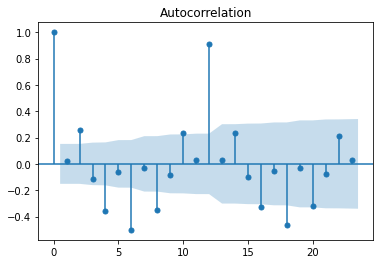

In [35]:
# Duplicate plots
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
fig_first = plot_acf(df["Milk First Difference"].dropna())

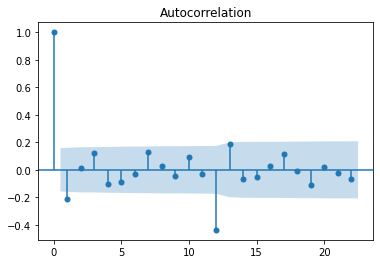

In [36]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

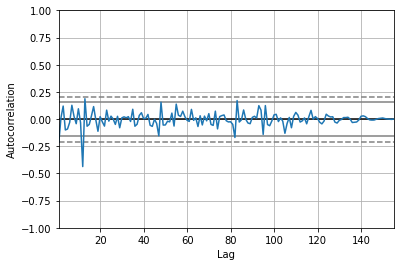

In [37]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

'\nIn general, a partial correlation is a conditional correlation.\n\nIt is the correlation between two variables under the assumption that we know and take into account the values of \nsome other set of variables.\n\nFor instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables. \nThe partial correlation between y and x3 is the correlation between the variables determined taking into account how \nboth y and x3 are related to x1 and x2.\n'

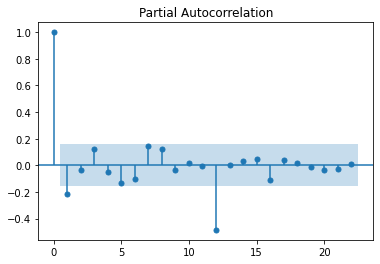

In [38]:
# Partial Autocorrelation
result = plot_pacf(df["Seasonal First Difference"].dropna())

'''
In general, a partial correlation is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of 
some other set of variables.

For instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables. 
The partial correlation between y and x3 is the correlation between the variables determined taking into account how 
both y and x3 are related to x1 and x2.
'''

In [39]:
'''
- Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. 
The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. 
Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. 
By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
- Identification of an MA model is often best done with the ACF rather than the PACF.
For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. 
A clearer pattern for an MA model is in the ACF. 
The ACF will have non-zero autocorrelations only at lags involved in the model.
'''

'\n- Identification of an AR model is often best done with the PACF.\nFor an AR model, the theoretical PACF “shuts off” past the order of the model. \nThe phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. \nPut another way, the number of non-zero partial autocorrelations gives the order of the AR model. \nBy the “order of the model” we mean the most extreme lag of x that is used as a predictor.\n- Identification of an MA model is often best done with the ACF rather than the PACF.\nFor an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. \nA clearer pattern for an MA model is in the ACF. \nThe ACF will have non-zero autocorrelations only at lags involved in the model.\n'

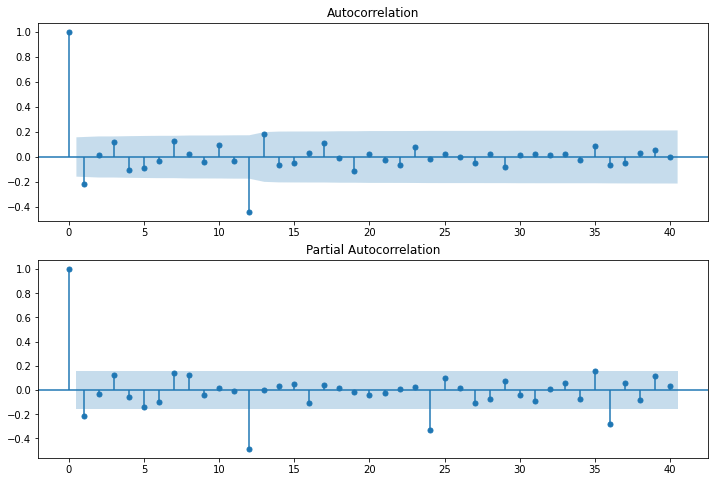

In [40]:
# ACF and PACF Plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [41]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [42]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


In [43]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Mon, 20 Sep 2021   AIC                           1074.131
Time:                                    10:27:33   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

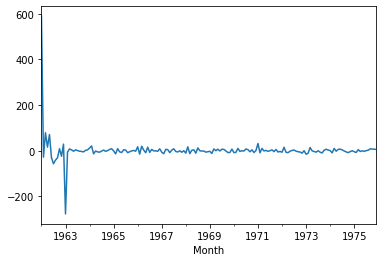

In [44]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

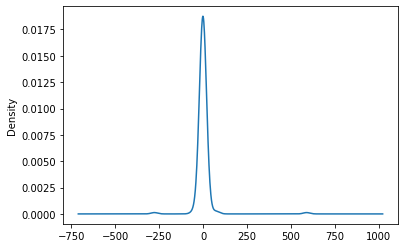

In [45]:
results.resid.plot(kind='kde')

<AxesSubplot:xlabel='Month'>

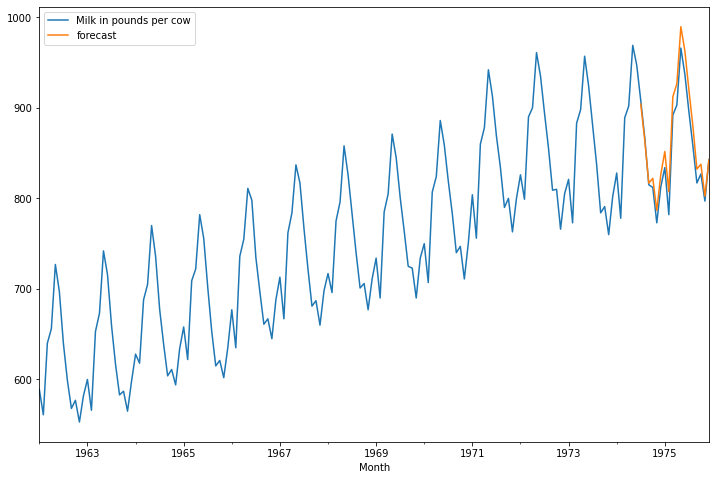

In [46]:
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)  
df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8))

In [47]:
df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,879.668976
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,832.328556
1975-10-01,827.0,10.0,51.0,15.0,13.0,837.722252
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,802.452739
1975-12-01,843.0,46.0,76.0,30.0,6.0,842.499873


In [48]:
from pandas.tseries.offsets import DateOffset

In [49]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]

In [50]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [51]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [52]:
future_df = pd.concat([df,future_dates_df])

In [53]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [54]:
future_df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

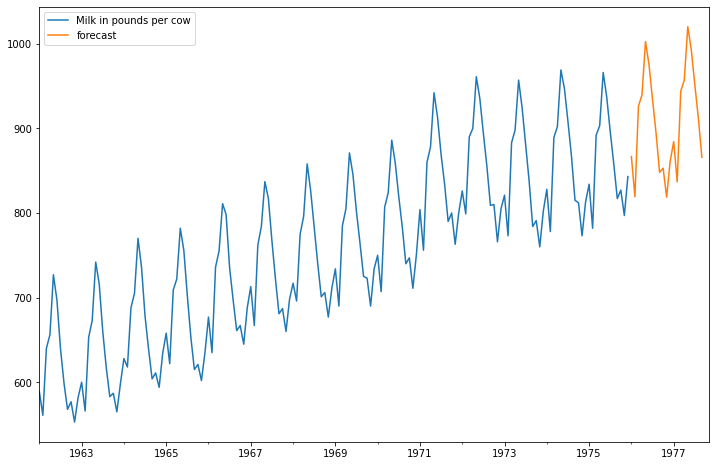

In [55]:
future_df['forecast'] = results.predict(start = 168, end = 188, dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8)) 